## Exploración de Datos sobre la Crisis de Refugiados de Venezuela (2014-2022)

### 1. Importación de Librerías y Carga de Datos

In [1]:
import pandas as pd
import numpy as np

# Importamos librerias para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos las gráficas
plt.style.use('seaborn-v0_8') 

# Configurar pandas para mostrar números completos sin notación científica
pd.set_option('display.float_format', '{:.0f}'.format)

#### 1.2. Carga de los Datasets

In [2]:
#  Cargar el archivo CSV en un DataFrame de  (Población Mundial, ya lo importamos en formato largo
df = pd.read_csv('../data/world_population_long.csv')

# Mostrar cuantas filas y columnas tiene el DataFrame
print(f"El DataFrame tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

El DataFrame tiene 16758 filas y 3 columnas.


In [3]:
# Cargar el dataset de migración saltando las primeras 4 filas de Metadata
dfm = pd.read_csv("../data/API_SM.POP.NETM_DS2_en_csv_v2_13382.csv", skiprows=4)  

# Mostrar cuantas filas y columnas tiene el dataset
print(f"El DataFrame tiene {dfm.shape[0]} filas y {dfm.shape[1]} columnas.")

El DataFrame tiene 266 filas y 69 columnas.


#### 1.3. Información de los DataFrame

In [4]:
# Información sobre el dataframe población
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16758 entries, 0 to 16757
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  16758 non-null  object 
 1   Year          16758 non-null  int64  
 2   Population    16758 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 392.9+ KB


In [5]:
# Información sobre el dataframe migración
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            265 non-null    float64
 5   1961            265 non-null    float64
 6   1962            265 non-null    float64
 7   1963            265 non-null    float64
 8   1964            265 non-null    float64
 9   1965            265 non-null    float64
 10  1966            265 non-null    float64
 11  1967            265 non-null    float64
 12  1968            265 non-null    float64
 13  1969            265 non-null    float64
 14  1970            265 non-null    float64
 15  1971            265 non-null    float64
 16  1972            265 non-null    float64
 17  1973            265 non-null    flo

#### 1.4. Visualización de las Primeras Filas de los DataFrame

In [6]:
# Mostrar las primeras filas del DataFrame para entender su estructura y contenido.
df.head()

,Country Name,Year,Population
0,Afghanistan,1960,8622466
1,Afghanistan,1961,8790140
2,Afghanistan,1962,8969047
3,Afghanistan,1963,9157465
4,Afghanistan,1964,9355514


In [7]:
# Mostrar las primeras filas del DataFrame para entender su estructura y contenido.
dfm.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,Net migration,SM.POP.NETM,-788,-566,-601,-650,-682,-727,...,373,405,434,431,420,0,503,152,147,NaN
1,Africa Eastern and Southern,AFE,Net migration,SM.POP.NETM,-102704,-38646,-56414,-42809,22280,7627,...,151528,-799850,340934,327087,100706,340127,187508,-220428,-989975,NaN
2,Afghanistan,AFG,Net migration,SM.POP.NETM,2606,6109,7016,6681,7079,10695,...,-286314,-143049,-71491,-36753,9159,143634,-548784,-647402,-48958,NaN
3,Africa Western and Central,AFW,Net migration,SM.POP.NETM,-759,-36991,-31675,-32310,-40403,-11060,...,-247654,50874,-72945,-178068,-270812,-39974,-149585,-81809,327673,NaN
4,Angola,AGO,Net migration,SM.POP.NETM,-40935,-74774,-77265,-78700,-79977,-81111,...,74171,91614,77731,61632,58984,7556,29094,-995,-995,NaN


## 2. Procesamiento y Transformación de Datos

#### 2.1. Conversión a Formato Largo y ordenar por países Dataset Migración

##### 2.1.1. Primero eliminamos columnas que no necesitamos

In [8]:
columnas_a_eliminar = ['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 68']

# Crear una copia del DataFrame sin esas columnas
dfm_clean = dfm.drop(columns=columnas_a_eliminar)

# Verificar las columnas restantes
print("\nColumnas después de eliminar:")
print(dfm_clean.columns.tolist())


Columnas después de eliminar:
['Country Name', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']


#### 2.1.2. Procedemos con la conversión a formato largo y ordenamos

In [9]:
df_longm = pd.melt(
  dfm_clean,
  id_vars=['Country Name'], 
  var_name='Year',
  value_name='Net_Migration'
)

# Ordenar el dataframe primero por país y luego por año
df_longm = df_longm.sort_values(by=['Country Name', 'Year'])

# Resetear los índices para que sean consecutivos
df_longm = df_longm.reset_index(drop=True)

# Mostrar las primeras filas para verificar la transformación inicial
print("Primeras filas del DataFrame de migración transformado:")
print(df_longm.head(10))

Primeras filas del DataFrame de migración transformado:
  Country Name  Year  Net_Migration
0  Afghanistan  1960           2606
1  Afghanistan  1961           6109
2  Afghanistan  1962           7016
3  Afghanistan  1963           6681
4  Afghanistan  1964           7079
5  Afghanistan  1965          10695
6  Afghanistan  1966           3563
7  Afghanistan  1967           6824
8  Afghanistan  1968           3333
9  Afghanistan  1969           2029


#### 2.2. Conversión del Tipo de Datos Dataset Migración

In [10]:
# Verificar el tipo de dato actual de la columna 'Year'
print(f"Tiipo de dato actual de la columna Year: {df_longm['Year'].dtype}")

# Convertir el año a tipo numérico
df_longm['Year'] = pd.to_numeric(df_longm['Year'])

# Verificar que la conversión fue exitosa
print(f"Nuevo tipo de dato de la columna Year: {df_longm['Year'].dtype}")

# Mostrar algunos datos 
df_longm.head(5)

Tiipo de dato actual de la columna Year: object
Nuevo tipo de dato de la columna Year: int64


,Country Name,Year,Net_Migration
0,Afghanistan,1960,2606
1,Afghanistan,1961,6109
2,Afghanistan,1962,7016
3,Afghanistan,1963,6681
4,Afghanistan,1964,7079


## 3. Crear un nuevo DataFrame combinando ambos

In [11]:
# Combinamos dataframes utilizando innerjoin
df_combined = pd.merge(
    df,               
    df_longm[['Country Name', 'Year', 'Net_Migration']],  
)

# Verificar el resultado
print("DataFrame combinado:")
print(df_combined.head(10))

DataFrame combinado:
  Country Name  Year  Population  Net_Migration
0  Afghanistan  1960     8622466           2606
1  Afghanistan  1961     8790140           6109
2  Afghanistan  1962     8969047           7016
3  Afghanistan  1963     9157465           6681
4  Afghanistan  1964     9355514           7079
5  Afghanistan  1965     9565147          10695
6  Afghanistan  1966     9783147           3563
7  Afghanistan  1967    10010030           6824
8  Afghanistan  1968    10247780           3333
9  Afghanistan  1969    10494489           2029


#### 3.1. Exportación Dataframe combinado a CSV

In [12]:
df_combined.to_csv('../data/world_population_net_migration.csv', index=False)

## 4. Identificar países

In [13]:
print(df_combined['Country Name'].unique()[:280])

['Afghanistan' 'Africa Eastern and Southern' 'Africa Western and Central'
 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Arab World' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Caribbean small states' 'Cayman Islands' 'Central African Republic'
 'Central Europe and the Baltics' 'Chad' 'Channel Islands' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Early-demographic dividend'
 'East Asia & Pacific' 'East Asia & Pacific (IDA & IBRD countries)'
 'East Asia & Pacific (excluding high income)' 'Ecu

## 5. Análisis Crisis de Refugiados de Venezuela (2014-2022)

#### 5.1. Obtención de datos para el periodo seleccionado

In [14]:
venezuela = df_combined[df_combined['Country Name'] == 'Venezuela, RB']

# Filtrar el período de interés (2014-2022)
venezuela_periodo = venezuela[(venezuela['Year'] >= 2014) & (venezuela['Year'] <= 2022)]

# Verificar que tenemos el periodo correcto
print("Datos de Venezuela para el periodo 2014-2022:")
print(venezuela_periodo.head(10))

Datos de Venezuela para el periodo 2014-2022:
        Country Name  Year  Population  Net_Migration
16308  Venezuela, RB  2014    30193258         -62437
16309  Venezuela, RB  2015    30529716         -77417
16310  Venezuela, RB  2016    30741464        -283270
16311  Venezuela, RB  2017    30563433        -817376
16312  Venezuela, RB  2018    29825653       -1355602
16313  Venezuela, RB  2019    28971683        -975534
16314  Venezuela, RB  2020    28490453        -524649
16315  Venezuela, RB  2021    28199867        -332936
16316  Venezuela, RB  2022    28301696        -141107


#### 5.2. Cálculo de la migración acumulada y su suma a la población para hacer una estimación de población sin éxodo

In [15]:
# Crear una copia del DataFrame 
venezuela_periodo = venezuela_periodo.copy()

# Calcular la migración neta acumulada
venezuela_periodo['Migracion_Acumulada'] = venezuela_periodo['Net_Migration'].cumsum()

# Calcular la población estimada sin éxodo (población actual + migración acumulada negativa)
venezuela_periodo['Poblacion_Sin_Exodo'] = venezuela_periodo['Population'] - venezuela_periodo['Migracion_Acumulada']

# Mostrar el resultado
print("Datos de Venezuela con estimación de población sin éxodo:")
print(venezuela_periodo[['Year', 'Population', 'Net_Migration', 'Migracion_Acumulada', 'Poblacion_Sin_Exodo']])

Datos de Venezuela con estimación de población sin éxodo:
       Year  Population  Net_Migration  Migracion_Acumulada  \
16308  2014    30193258         -62437               -62437   
16309  2015    30529716         -77417              -139854   
16310  2016    30741464        -283270              -423124   
16311  2017    30563433        -817376             -1240500   
16312  2018    29825653       -1355602             -2596102   
16313  2019    28971683        -975534             -3571636   
16314  2020    28490453        -524649             -4096285   
16315  2021    28199867        -332936             -4429221   
16316  2022    28301696        -141107             -4570328   

       Poblacion_Sin_Exodo  
16308             30255695  
16309             30669570  
16310             31164588  
16311             31803933  
16312             32421755  
16313             32543319  
16314             32586738  
16315             32629088  
16316             32872024  


#### 5.3. Gráfico de evolución de población e hipótesis de evolución poblacional sin éxodo

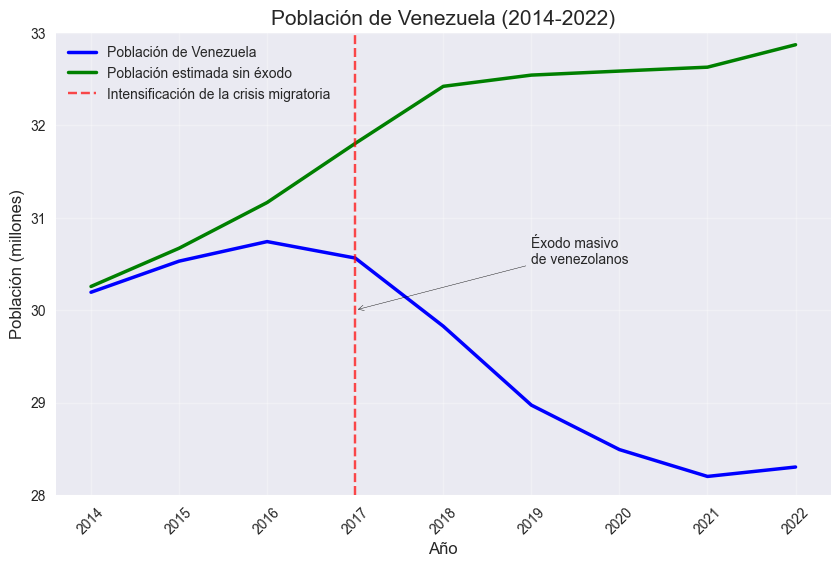

In [16]:
# Crear la figura 
plt.figure(figsize=(10, 6))

# Dibujar la línea de población real para Venezuela (convertida a millones)
plt.plot(venezuela_periodo['Year'], venezuela_periodo['Population']/1000000, 
         'b-', linewidth=2.5, label='Población de Venezuela')

# Añadir la línea de población sin éxodo
plt.plot(venezuela_periodo['Year'], venezuela_periodo['Poblacion_Sin_Exodo']/1000000, 
         'g-', linewidth=2.5, label='Población estimada sin éxodo')

# Añadir línea vertical para marcar el inicio de la crisis
plt.axvline(x=2017, color='r', linestyle='--', alpha=0.7, 
            label='Intensificación de la crisis migratoria')

# Personalizar el gráfico
plt.title('Población de Venezuela (2014-2022)', fontsize=15)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Población (millones)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

# Límites del eje Y - Ajustado para que se vean ambas líneas
plt.ylim(28, 33)  

# Configurar el eje X para mostrar todos los años
años = list(range(2014, 2023))  
plt.xticks(años, [str(año) for año in años], rotation=45)

# Añadir anotación para destacar la caída
plt.annotate('Éxodo masivo\nde venezolanos', 
             xy=(2017, 30), 
             xytext=(2019, 30.5),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black'),
             fontsize=10)

# Mostrar el gráfico
plt.show()

<small>*La crisis de refugiados venezolana representa uno de los mayores desplazamientos humanos de la historia reciente de América Latina. A partir de 2016-2017, Venezuela experimentó una dramática disminución poblacional causada por la hiperinflación, escasez de alimentos y medicinas, y colapso de servicios básicos. Según nuestro análisis de datos poblacionales oficiales, Venezuela perdió aproximadamente 4.57 millones de habitantes por emigración entre 2014 y 2022, con el periodo más intenso entre 2017 y 2019, cuando más de 3.1 millones de personas abandonaron el país. Para 2022, la diferencia entre la población real (28.3 millones) y la proyección sin éxodo (32.9 millones) era de 4.57 millones de personas. Esta emigración masiva ha provocado una importante crisis humanitaria regional, especialmente en Colombia, Perú, Ecuador y Chile, principales países receptores de la diáspora venezolana.*</small>

## 6. Impacto Regional del Éxodo Venezolano (2014-2022)

#### 6.1. Obtención de datos migración Colombia, Perú, Ecuador y Chile

In [17]:
colombia = df_combined[df_combined['Country Name'] == 'Colombia']
ecuador = df_combined[df_combined['Country Name'] == 'Ecuador']
peru = df_combined[df_combined['Country Name'] == 'Peru']
chile = df_combined[df_combined['Country Name'] == 'Chile']

# Filtrar el período de interés (2014-2022)
colombia_periodo = colombia[(colombia['Year'] >= 2014) & (colombia['Year'] <= 2022)]
ecuador_periodo = ecuador[(ecuador['Year'] >= 2014) & (ecuador['Year'] <= 2022)]
peru_periodo = peru[(peru['Year'] >= 2014) & (peru['Year'] <= 2022)]
chile_periodo = chile[(chile['Year'] >= 2014) & (chile['Year'] <= 2022)]


# Verificar que tenemos el periodo correcto
print("Datos de Colombia para el periodo 2014-2022:")
print(colombia_periodo.head(10))
print("Datos de Ecuador para el periodo 2014-2022:")
print(ecuador_periodo.head(10))
print("Datos de Perú para el periodo 2014-2022:")
print(peru_periodo.head(10))
print("Datos de Chile para el periodo 2014-2022:")
print(chile_periodo.head(10))

Datos de Colombia para el periodo 2014-2022:
     Country Name  Year  Population  Net_Migration
3015     Colombia  2014    46677947         -67522
3016     Colombia  2015    47119728         -41123
3017     Colombia  2016    47625955         104373
3018     Colombia  2017    48351671         431072
3019     Colombia  2018    49276961         495524
3020     Colombia  2019    50187406         396826
3021     Colombia  2020    50930662         227130
3022     Colombia  2021    51516562         199070
3023     Colombia  2022    51874024         183180
Datos de Ecuador para el periodo 2014-2022:
     Country Name  Year  Population  Net_Migration
4212      Ecuador  2014    15957994           2273
4213      Ecuador  2015    16195902          14724
4214      Ecuador  2016    16439585          35461
4215      Ecuador  2017    16696944          53707
4216      Ecuador  2018    17015672          95482
4217      Ecuador  2019    17343740          54921
4218      Ecuador  2020    17588595         

#### 6.3. Gráfico Evolución Migración Neta Regional

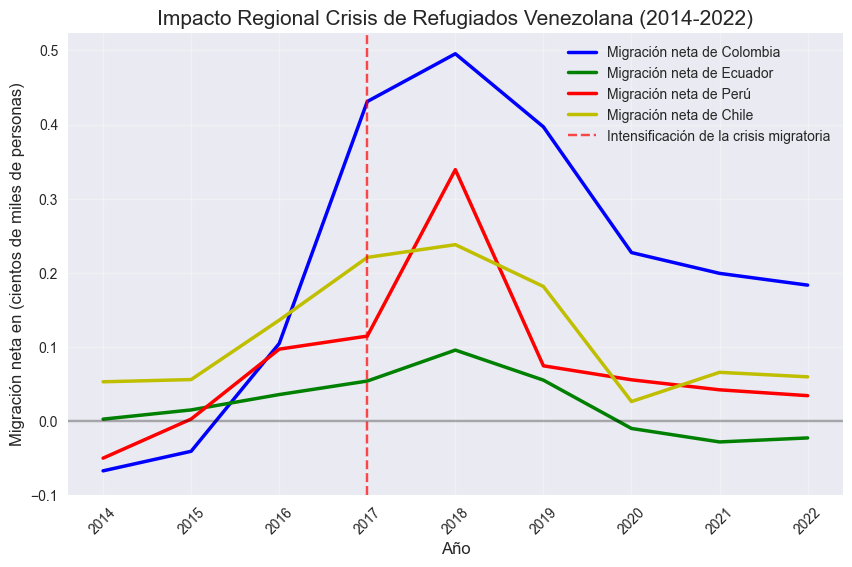

In [18]:
# Crear la figura 
plt.figure(figsize=(10, 6))

# Dibujar la línea de migración neta por año para Colombia, Ecuador, Perú y Chile
plt.plot(colombia_periodo['Year'], colombia_periodo['Net_Migration']/1000000, 
         'b-', linewidth=2.5, label='Migración neta de Colombia')
plt.plot(ecuador_periodo['Year'], ecuador_periodo['Net_Migration']/1000000,
          'g-', linewidth=2.5, label='Migración neta de Ecuador')
plt.plot(peru_periodo['Year'], peru_periodo['Net_Migration']/1000000,
         'r-', linewidth=2.5, label='Migración neta de Perú')
plt.plot(chile_periodo['Year'], chile_periodo['Net_Migration']/1000000,
          'y-', linewidth=2.5, label='Migración neta de Chile')

# Añadir línea vertical para marcar el inicio de la crisis
plt.axvline(x=2017, color='r', linestyle='--', alpha=0.7, 
            label='Intensificación de la crisis migratoria')

# Añadir línea horizontal en cero
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

plt.ylim(-0.1, None)

# Personalizar el gráfico
plt.title('Impacto Regional Crisis de Refugiados Venezolana (2014-2022)', fontsize=15)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Migración neta en (cientos de miles de personas)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

# Configurar el eje X para mostrar todos los años
años = list(range(2014, 2023))  
plt.xticks(años, [str(año) for año in años], rotation=45)

# Mostrar el gráfico
plt.show()

<small>*Los datos de migración neta confirman el impacto regional del éxodo venezolano entre 2016-2020. Colombia, principal país receptor, pasó de una migración neta negativa en 2015 (-41,123) a positiva desde 2016, alcanzando su pico en 2018 (495,524). Perú experimentó un cambio similar, pasando de -50,383 en 2014 a 339,067 en 2018. Ecuador mostró aumentos significativos entre 2016-2019, mientras Chile mantuvo cifras positivas durante todo el periodo, con máximos en 2017-2018. Estos patrones coinciden con las fases de intensificación de la crisis venezolana, destacando cómo la migración transformó el balance demográfico regional, convirtiendo a países tradicionalmente emisores de migrantes en importantes receptores de población.*</small>